<link rel="preconnect" href="https://fonts.googleapis.com"> 
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin> 
<link href="https://fonts.googleapis.com/css2?family=Baloo+Bhaijaan+2:wght@600&display=swap" rel="stylesheet">



#

<div style="font-family: Helvetica; color: #7798ab; padding:5px; background-color: white">
    <br>
    <h1>🏨 Hotel Dataset Analysis for Cancelation </h1>
    <p style="color:black;">Designed and Analyized <b>by Shivani Kalewar</b> for IST 687</p>
    <br>
    <br>
</div>
   


*Importing required libraries*

In [83]:
# Library Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [84]:
df = pd.read_csv("Resort01.csv")

## Database Preview

### Database Column and Shape Analysis

In [85]:

print("dataset shape: ", df.shape)
print(df.info())


# Thera are 40060 rows in the dataset. We can see there are only null values in the Country attribute. 

dataset shape:  (40060, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   IsCanceled                   40060 non-null  int64 
 1   LeadTime                     40060 non-null  int64 
 2   StaysInWeekendNights         40060 non-null  int64 
 3   StaysInWeekNights            40060 non-null  int64 
 4   Adults                       40060 non-null  int64 
 5   Children                     40060 non-null  int64 
 6   Babies                       40060 non-null  int64 
 7   Meal                         40060 non-null  object
 8   Country                      39596 non-null  object
 9   MarketSegment                40060 non-null  object
 10  IsRepeatedGuest              40060 non-null  int64 
 11  PreviousCancellations        40060 non-null  int64 
 12  PreviousBookingsNotCanceled  40060 non-null  int64 
 13  Res

In [328]:
df.groupby('IsCanceled')['IsCanceled'].value_counts()

IsCanceled  IsCanceled
0           0             28938
1           1             11122
Name: IsCanceled, dtype: int64

In [86]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("There are ", len(categorical_cols), " categorical columns in the dataset")
print(categorical_cols)

numeric_cols = df.select_dtypes(include=['int64']).drop(['IsCanceled'], axis=1).columns
print("There are ", len(numeric_cols), " numeric values in the dataset.")
print(numeric_cols)
print("outcome column ignored")

There are  7  categorical columns in the dataset
Index(['Meal', 'Country', 'MarketSegment', 'ReservedRoomType',
       'AssignedRoomType', 'DepositType', 'CustomerType'],
      dtype='object')
There are  12  numeric values in the dataset.
Index(['LeadTime', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults',
       'Children', 'Babies', 'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'BookingChanges',
       'RequiredCarParkingSpaces', 'TotalOfSpecialRequests'],
      dtype='object')
outcome column ignored


In [87]:
df[numeric_cols].describe()

,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.00000
mean,92.675686,1.189815,3.128732,1.867149,0.128682,0.013904,0.044383,0.101722,0.146455,0.287968,0.138068,0.61977
std,97.285315,1.147812,2.461329,0.697285,0.445195,0.118998,0.205948,1.335115,1.001955,0.726548,0.351001,0.81393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,10.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,57.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,155.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
max,737.000000,19.000000,50.000000,55.000000,10.000000,2.000000,1.000000,26.000000,30.000000,17.000000,8.000000,5.00000


In [88]:
df[categorical_cols].describe()

,Meal,Country,MarketSegment,ReservedRoomType,AssignedRoomType,DepositType,CustomerType
count,40060,39596,40060,40060,40060,40060,40060
unique,5,125,6,10,11,3,4
top,BB,PRT,Online TA,A,A,No Deposit,Transient
freq,30005,17630,17729,23399,17046,38199,30209


### Unique Value Analysis

In [89]:
# Analyzing unique values
# Checking all unique values in both categorical as well as numeric attributes

print("{:35} {:5} {:<10}" .format ('Attribute', '| unique |', '     values'))
print("{:35} {:2} {:3}" .format ('-----------------------------------', '| ------ |', '-----------------------------'))
for i in df.columns:
    
    print("{:35} \t {:5} {:3}" .format (i, str(len(df[i].unique())), str(df[i].unique()) if len(df[i].unique()) < 8 else ''))


Attribute                           | unique |      values
----------------------------------- | ------ | -----------------------------
IsCanceled                          	 2     [0 1]
LeadTime                            	 412      
StaysInWeekendNights                	 16       
StaysInWeekNights                   	 31       
Adults                              	 14       
Children                            	 5     [ 0  1  2 10  3]
Babies                              	 3     [0 1 2]
Meal                                	 5     ['BB       ' 'FB       ' 'HB       ' 'SC       ' 'Undefined']
Country                             	 126      
MarketSegment                       	 6     ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups']
IsRepeatedGuest                     	 2     [0 1]
PreviousCancellations               	 11       
PreviousBookingsNotCanceled         	 31       
ReservedRoomType                    	 10       
AssignedRoomType                    	 11 

In [138]:
df[df['RequiredCarParkingSpaces'] == 8]

,IsCanceled,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,...,DepositType,CustomerType,RequiredCarParkingSpaces,TotalOfSpecialRequests,totalMembers,roomDiff,totalStayDays,isFamily,cancelRate,isWeekend
29045,0,26,0,5,2,0,0,HB,AUT,Direct,...,No Deposit,Transient-Party,8,1,2,1,5,0,0.0,0
29046,0,138,2,2,2,0,0,HB,AUT,Direct,...,No Deposit,Transient-Party,8,0,2,1,4,0,0.0,1


## Feature Engineering

In [90]:
# Taking into consideration the total number of guest per booking
df['totalMembers'] = df.Adults + df.Babies + df.Children

# Checking if the room reserved and the room assigned is the same
df['roomDiff'] = np.where (df.AssignedRoomType  == df.ReservedRoomType, 0, 1)

# Taking the sum of total stay days rather than weekend and weekdays seperate
df['totalStayDays'] = df.StaysInWeekNights + df.StaysInWeekendNights

# Assumption: If there are adults with children or babies, it is a family. Storing this information in a boolean attribute
df['isFamily'] = np.where((df.Adults > 1) & ((df.Children > 0 )| (df.Babies > 0)),1 ,0) 

# The cancelation rate of a guest currently making a booking
df['cancelRate'] = df['PreviousCancellations'] / (df['PreviousCancellations'] + df['PreviousBookingsNotCanceled'] ) * 100 

# Using a boolean to track if the stay includes weekend or not
df['isWeekend'] = np.where(df['StaysInWeekendNights']> 0, 1, 0)

In [329]:
df.shape

(40060, 26)

## Data Cleaning

We already know a few bookings dont have origin country information

Checking if there are any values that do not make sense. 

<b> Rules: </b>
- The total number of guests cannot be zero
-  There can't be a repeated guest if he/she has no previous booking canceled/ not canceled
- There shouldn't babies/children with no adults booking
- The total number of days of stay should not be zero

### Total Members

In [92]:
df.loc[ df['totalMembers']==0, "IsCanceled"]
# There are 13 rows where there are no guest booked and only 2 of them were canceled. 

# Creating a new dataframe that will hold our data for visualization 
# that is clean of all outlliers and wrong data based on our assumptions

clean_df = df.loc[~(df['totalMembers']==0)]


### Total Stay Days

In [93]:
print(df.loc[ df['totalStayDays']==0, ["IsCanceled", "StaysInWeekNights", "StaysInWeekendNights", "totalStayDays"]].sort_values(by="IsCanceled",ascending =False))
# There are 384 enteries where the booking was made for 0 days 


clean_df = clean_df.loc[~(clean_df['totalStayDays']==0)]



       IsCanceled  StaysInWeekNights  StaysInWeekendNights  totalStayDays
4127            1                  0                     0              0
25333           1                  0                     0              0
24660           1                  0                     0              0
19823           1                  0                     0              0
28550           1                  0                     0              0
...           ...                ...                   ...            ...
19605           0                  0                     0              0
19604           0                  0                     0              0
19593           0                  0                     0              0
19579           0                  0                     0              0
39852           0                  0                     0              0

[384 rows x 4 columns]


(39666, 26)

In [94]:
# Meal column has two factors which are the same, therefore lets combine them

clean_df.Meal = np.where(clean_df.Meal == "SC       ", "Undefined",clean_df['Meal'])
print(clean_df.Meal.unique())

['BB       ' 'FB       ' 'HB       ' 'Undefined']


In [114]:
clean_df.cancelRate.fillna(0)
clean_df[clean_df['cancelRate']>0].shape

(1094, 26)

In [330]:
clean_df.shape

(39666, 27)

## Attribute Analysis  

### Numeric Categories

Lead Times

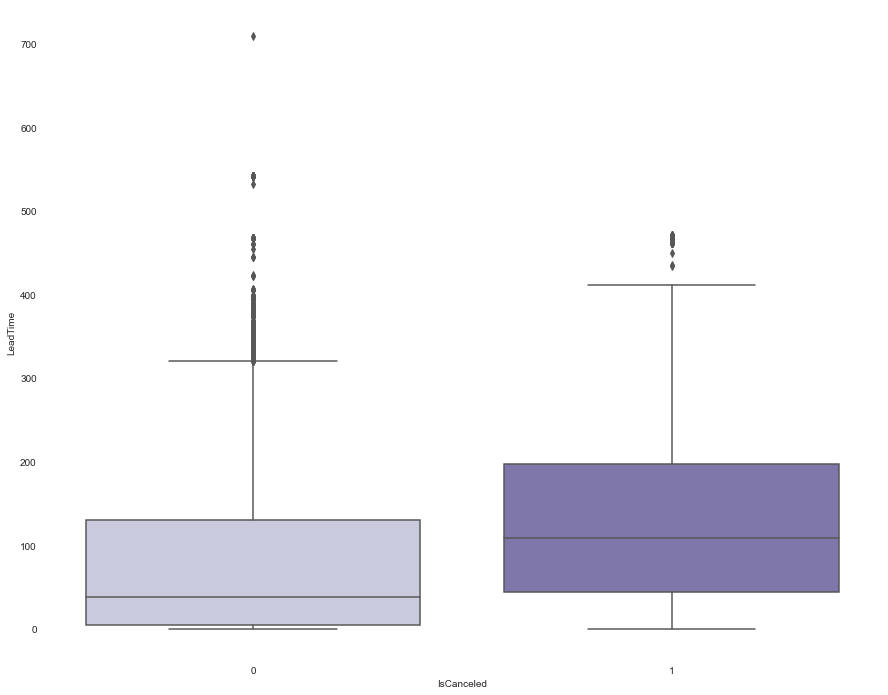

In [332]:
clean_df['LeadTimeCat'] = pd.cut(clean_df.LeadTime, bins=[0,1,50,100,150,200,250,300,365,9999], labels=[0,1,2,3,4,5,6,7,8])
clean_df.LeadTimeCat.fillna(7)
clean_df.head() 

plt.figure(figsize=(15,12))
sns.set_style("white")
# sns.countplot (x='LeadTimeCat', data=clean_df, hue='IsCanceled', palette="PuRd")
sns.boxplot (y='LeadTime', data=clean_df, x='IsCanceled', palette="Purples")
# sns.violinplot (y='LeadTime', data=clean_df[clean_df.LeadTime < 365], x='IsCanceled',palette="Greens").set_title("Box Plot for Lead Time [Trimmed to only one year]")
plt.box(False)

In [296]:
clean_df_trimmed = clean_df [ [ 'IsCanceled', 'LeadTime',  'Meal', 'Country', 'MarketSegment','IsRepeatedGuest', 'ReservedRoomType', 'AssignedRoomType','BookingChanges', 'DepositType', 'CustomerType', 'RequiredCarParkingSpaces', 'TotalOfSpecialRequests', 'totalMembers','roomDiff', 'totalStayDays', 'isFamily', 'cancelRate', 'isWeekend' ] ]


In [301]:

clean_df.groupby("IsCanceled")['LeadTime'].describe()
clean_df[clean_df.LeadTime == ]

,IsCanceled,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,...,CustomerType,RequiredCarParkingSpaces,TotalOfSpecialRequests,totalMembers,roomDiff,totalStayDays,isFamily,cancelRate,isWeekend,LeadTimeCat
4182,0,709,8,20,2,0,0,HB,GBR,Direct,...,Transient,0,0,2,0,28,0,NaN,1,8


In [325]:
clean_df_trimmed[clean_df_trimmed.LeadTime > 365 ].groupby('IsCanceled')['IsCanceled'].value_counts()

IsCanceled  IsCanceled
0           0             234
1           1             207
Name: IsCanceled, dtype: int64

Total days of stay

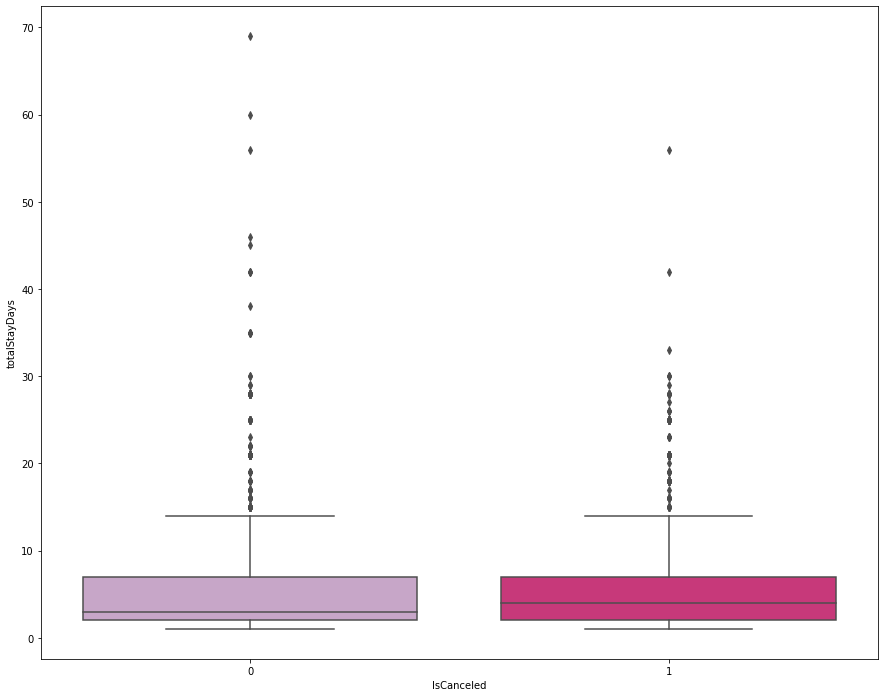

In [159]:
plt.figure(figsize=(15,12))
sns.boxplot (y='totalStayDays', data=clean_df, x='IsCanceled', palette="PuRd")

Text(0.5, 1.0, 'Box Plot for Total Stay Days [Outliers clipped]')

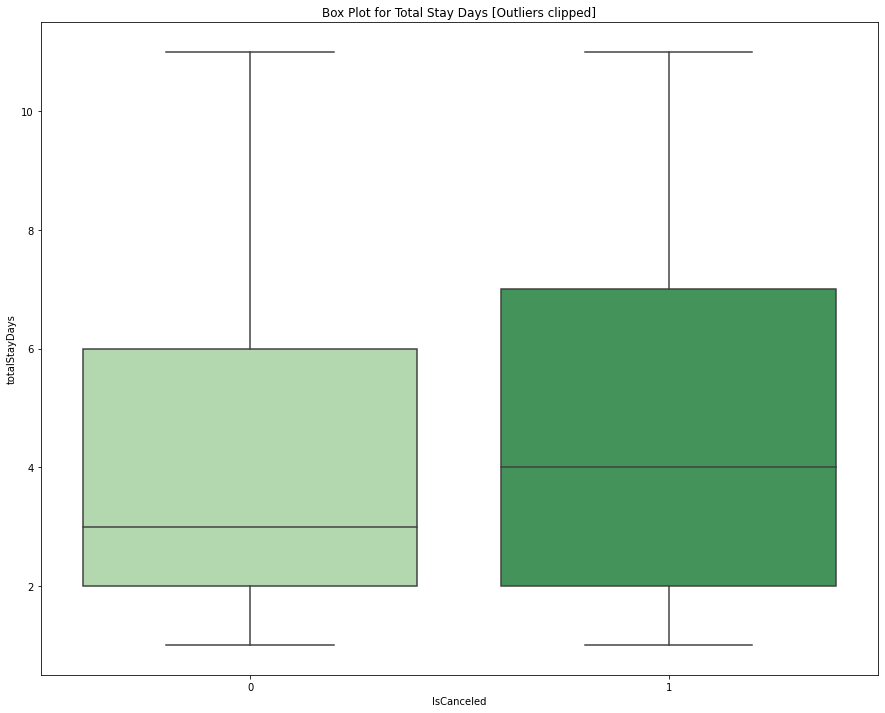

In [162]:
plt.figure(figsize=(15,12))
sns.boxplot (y='totalStayDays', data=clean_df[clean_df['totalStayDays'] < 12], x='IsCanceled', palette="Greens").set_title("Box Plot for Total Stay Days [Outliers clipped]")

isWeekend  IsCanceled
0          0             10562
           1              3233
1          0             17994
           1              7877
Name: IsCanceled, dtype: int64


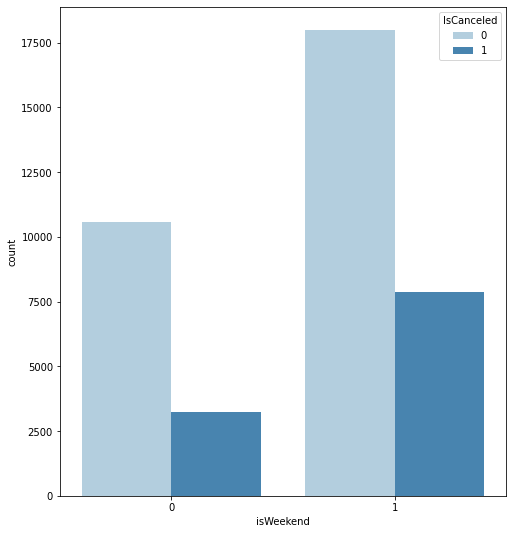

In [171]:
print(clean_df.groupby(['isWeekend'])['IsCanceled'].value_counts())

plt.figure(figsize=(8,9))
sns.countplot ( data=clean_df, x='isWeekend', hue="IsCanceled", palette="Blues")


### Categorical Variables

Is Canceled

TypeError: distplot() got an unexpected keyword argument 'data'

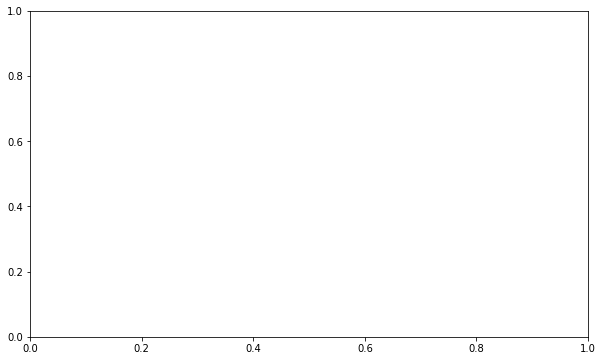

In [174]:

bar,ax = plt.subplots(figsize=(10,6))
ax = sns.distplot(x='IsCanceled', data=clean_df, palette="muted", kind="hist", )
ax.set_title("Pie chart approximation in Seaborn - Total Tip by Delivery Type", fontsize=15)

# calculate the percentages and annotate the sns barplot
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )


In [311]:
clean_df[clean_df.MarketSegment == 'Groups'].groupby('LeadTime')['IsCanceled'].value_counts()

LeadTime  IsCanceled
0         0             14
          1              3
1         0              6
          1              4
2         0             12
                        ..
462       1             20
468       1             30
          0             17
471       1              6
542       0             23
Name: IsCanceled, Length: 396, dtype: int64

In [337]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y+400), size = 12)
    plt.show()

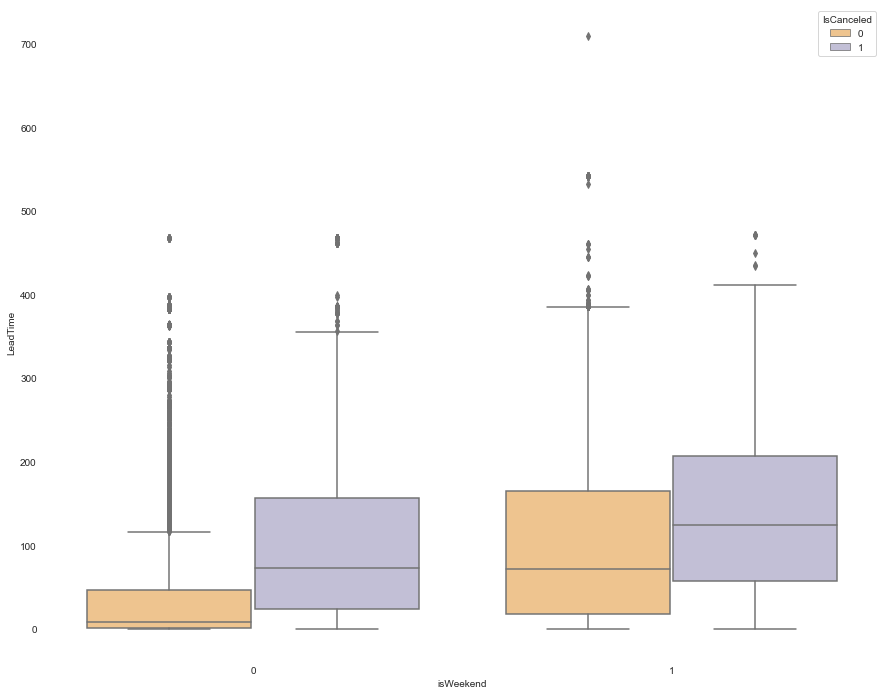

In [341]:
f, ax = plt.subplots(figsize=(15,12))
sns.set_style('white')
plt.box(False)
s = sns.boxplot(x = "isWeekend",  y = 'LeadTime', data=clean_df , hue="IsCanceled",palette="PuOr")
# with_hue(s,clean_df.isWeekend, 2, 2)